<h1>Assessing State-Mandated Financial Literacy Education in High Schoolers for Long Term Success</h1>
<h3>By: Philip Meng</h3>

<h2>Introduction</h2>

As teenagers transition into adulthood, they are suddenly forced to make a range of financial decisions, from managing credit cards to budgeting for rent and student loans. Yet, studies consistently reveal that young adults in the United States often lack the basic financial knowledge and behaviors needed to navigate these challenges successfully (Lusardi & Mitchell, 2014). Noticing this need for financial literacy education, a growing number of U.S. states have instituted mandatory personal finance education in high schools, with the hope that early intervention can instill long-term financial competence. 

As of the time of writing this paper, there are 10 states that have instituted a one semester Personal Finance course requirement for high school graduation: Virginia (since 2015), Tennessee (since 2013), Mississipi (since 2022), Utah (since 2008), Missouri (since 2010), Rhode Island (since 2021), Alabama (since 2013), North Carolina (since 2024), Nebraska (since 2021), and Iowa (since 2023) (Next Gen Personal Finance, 2025). 

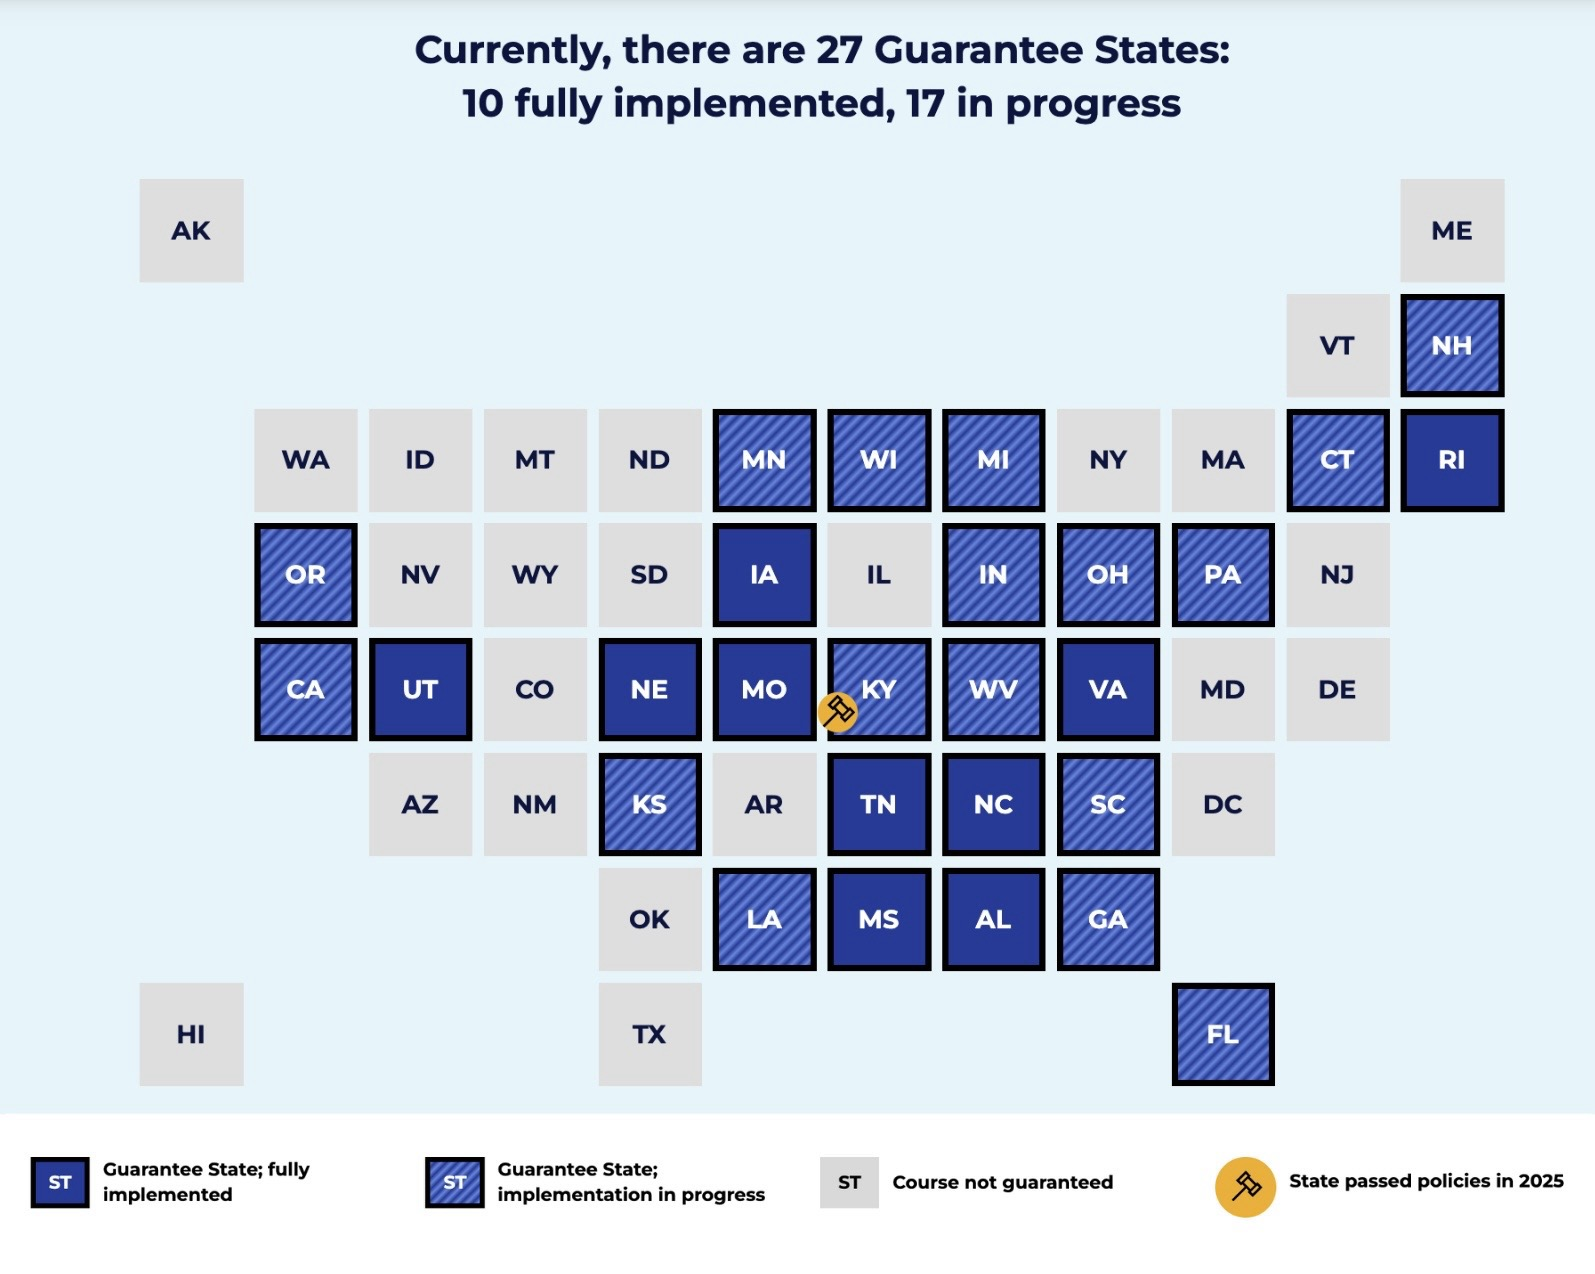

Figure 1. The NGPF U.S. Dashboard displays state-by-state progress toward requiring a standalone personal finance course for high school graduation, highlighting nationwide momentum toward financial literacy education (Next Gen Personal Finance, 2025).

**This project evaluates the impact of these state-mandated financial literacy courses on young adults’ financial behavior and perceived financial well-being by comparing cohorts pre and post-mandate from 2013 and 2023 using data from the Federal Reserve’s Survey of Household Economics and Decisionmaking (SHED).**

Prior research has documented a troubling gap between what young people know about personal finance and the complexity of the decisions they must make (Lusardi, Mitchell & Curto, 2010). Financial illiteracy is actively associated with higher rates of debt mismanagement, lower credit scores, and lower savings rates (Fernandes, Lynch, & Netemeyer, 2014). While randomized trials and meta-analyses have yielded mixed findings on the effectiveness of financial education (Willis, 2011; Kaiser & Menkhoff, 2017), emerging evidence suggests that well-designed, school-based financial education—especially when delivered through mandates—can improve financial behaviors. For example, a longitudinal study by Urban et al. (2020) found that high school financial education requirements were associated with reduced likelihood of holding credit card debt and increased likelihood of applying for aid and grants in college.

Our research focuses on assessing whether those benefits materialize across a broader population. Specifically, the guiding questions are: 
> (1) Do young adults from states with mandated financial literacy education show better credit management and financial well-being than those from states without such mandates? <br>
> (2) To what extent can these improvements be attributed to the educational intervention, rather than broader economic or generational factors?

**Our hypothesis is that state-mandated financial literacy education improves both objective financial behaviors, such as credit card repayment, as well as subjective financial confidence or perceived well-being. If true, this would suggest that early interventions of financial literacy education leads to greater financial success.**

<h2>Methodology</h2>
<h4>The Dataset</h4>
For our research, we will be using the Federal Reserve's annual SHED (Survey of Household Economics and Decisionmaking) survey as our dataset (Federal Reserve, 2025). There are two datasets: one from 2013 (the earliest available dataset), and the other from 2023 (most recent). 

<h4>Age Ranges</h4>

First, we can assume that students will have received their mandated financial literacy course by the time they graduate from high school (when they are 17 to 18-year-old). Second, for this paper, we will designate the age range of “young adult/teenager” to 18-24 years old in the context of financial independence, as supported by the Money Smart for Young Adults program by the Federal Deposit Insurance Corporation (FDIC, 2022).

Since 2013 will be the dataset year that we're comparing the 2023 dataset against, we will be looking for young adults who were not exposed to financial literacy mandates. Then, we will compare the young adults from those states from 2013 vs 2023, across two financial literacy markers to determine if mandated financial education makes a difference.

For the 2013 dataset, we can use the following age ranges that are unaffected by the mandate: <br>
> Virginia: 18-24 <br>
> Tennessee: 19-24 <br>
> Missippi: 18-24 <br>
> Utah: 24 <br>
> Missouri: 22-24 <br>
> Rhode Island: 18-24 <br>
> Alabama: 19-24 <br>
> Nebraska: 18-24 <br>
> Iowa: 18-24 <br>
> North Carolina: (non-usable due to limitations of 2023 dataset) <br>


For the 2023 dataset, we can use the following age ranges that are affected by the mandate:
> Virginia: 18-24 <br>
> Tennessee: 18-24 <br>
> Missippi: 18-19 <br>
> Utah: 18-24 <br>
> Missouri: 18-24 <br>
> Rhode Island: 18-20 <br>
> Alabama: 18-24 <br>
> Nebraska: 18-20 <br>
> Iowa: 18 <br>
> North Carolina: (non-usable due to limitations of 2023 dataset) <br>


<h4>Importing Libraries</h4>

I imported all of the necessary libraries I would use in my research:
> **Pandas**: A library for fast, flexible data manipulation and analysis using DataFrame structures <br> 
> **IPython**: An enhanced interactive Python shell offering rich media, shell syntax, and magic commands for efficient working <br>

In [1]:
import pandas as pd
from IPython.display import display

<h4>Reading the Data</h4>

Next, I set up the data files from the Federal Reserve's annual SHED survey dataset and ensure variable names are all readable. I also define the 9 state mandates that I will be using out of the 10, and standardize column names by lowercasing everything.

In [3]:
# Load SHED data from CSV files
shed2013 = pd.read_csv("public2013.csv", encoding='latin1', low_memory=False)
shed2023 = pd.read_csv("public2023.csv", encoding='latin1', low_memory=False)
# Included "low_memory=False" to resolve warning as stated in DtypeWarning error message

# Defining the 7 state mandates instituted AFTER 2013 (our analysis focus)
post2013_states = {'VA', 'MS', 'RI', 'NE', 'AL', 'MO', 'TN', "IA", "UT"}

# Standardize column names
shed2013.columns = shed2013.columns.str.lower()
shed2023.columns = shed2023.columns.str.lower()

In the SHED2013 survey, States are represented by certain codes. The 1960 Census State Codes for SHED2013 (e.g., 31->OH, 44->ND, 59->FL, 84->CO) are listed in the 2013 questionnaire codebook so here we normalise state codes to USPS two-letter abbreviations for simplicity. 

In [4]:
# Normalize state codes to USPS two‐letter abbreviations
def normalize_state_codes(df):
    state_col = next(col for col in df.columns if 'ppstat' in col)
    df['state_abbrev'] = (df[state_col].astype(str).str.strip().str.upper())

# I used pandas documentation for .astype() (pandas development team, 2025).

normalize_state_codes(shed2013)
normalize_state_codes(shed2023)

Next, from the young adult cohort of both the 2013 and 2023 datasets, I filtered out all young adults (18-24 y/o) in the nine target states for both years:

In [5]:
# Defining the 9 states of interest
target_states = ['VA', 'MS', 'RI', 'NE', 'AL', 'MO', 'TN', "IA", "UT"]

# 2013: derive age and filter
shed2013['age'] = 2013 - shed2013['xyear']
shed2013_teens = shed2013[
    shed2013['state_abbrev'].isin(target_states) &
    shed2013['age'].between(18,24)
].copy()

# 2023: filter directly on 'ppage' variable (age)
shed2023_teens = shed2023[
    shed2023['state_abbrev'].isin(target_states) &
    shed2023['ppage'].between(18,24)
].copy()

# 4) Quick sanity check
print("2013 teens in target states (18–24):", len(shed2013_teens))
print("2023 teens in target states (18–24):", len(shed2023_teens))


2013 teens in target states (18–24): 39
2023 teens in target states (18–24): 88


Then, I computed an age variable to filter for my target teenager age ranges for both the 2013 and 2023 datasets (essentially, hard-coding in those year ranges). Below is the code to continue filtering from the last code cell to teens within the age ranges.

In [6]:
# 2013: derive age
shed2013['age'] = 2013 - shed2013['xyear']

# State‐specific non-exposed ranges in 2013
age_windows_2013 = {
    'VA': (18,24), 'TN': (19,24), 'MS': (18,24), 'MO': (22,24),
    'RI': (18,24), 'AL': (19,24), 'NE': (18,24), 'IA': (18,24), 'UT': (24,24)
}

mask13 = pd.Series(False, index=shed2013.index)
for state, (low, high) in age_windows_2013.items():
    mask13 |= (
        (shed2013['state_abbrev'] == state) &
        shed2013['age'].between(low, high)
    )
shed2013_young = shed2013[mask13].copy()


# 2023: apply exposed ranges (once again: ppage is age)
age_windows_2023 = {
    'VA': (18,24), 'TN': (18,24), 'MS': (18,19), 'MO': (18,24),
    'RI': (18,20), 'AL': (18,24), 'NE': (18,20), 'IA': (18,18), 'UT': (18,24)
}

mask23 = pd.Series(False, index=shed2023.index)
for state, (low, high) in age_windows_2023.items():
    mask23 |= (
        (shed2023['state_abbrev'] == state) &
        shed2023['ppage'].between(low, high)
    )
shed2023_young = shed2023[mask23].copy()


# Quick sanity check
print("2013 filtered teens:", shed2013_young.shape[0])
print("2023 filtered teens:", shed2023_young.shape[0])

2013 filtered teens: 35
2023 filtered teens: 72


Finally, below is the code to see the distribution for the correct age range teens by state (to supplement the code above)

In [7]:
# Distribution of filtered teens by state for 2013 and 2023
for year, df in [("2013", shed2013_young), ("2023", shed2023_young)]:
    print(f"\n{year} Distribution by State (n and % of total):")
    
    counts = df['state_abbrev'].value_counts().sort_index()
    props  = df['state_abbrev'].value_counts(normalize=True).sort_index() * 100
    
    # Print each state with count and percentage
    for state in counts.index:
        print(f"{state}: {counts[state]} ({props[state]:.1f}%)")


2013 Distribution by State (n and % of total):
AL: 4 (11.4%)
IA: 6 (17.1%)
MO: 2 (5.7%)
MS: 4 (11.4%)
NE: 3 (8.6%)
RI: 2 (5.7%)
TN: 3 (8.6%)
UT: 1 (2.9%)
VA: 10 (28.6%)

2023 Distribution by State (n and % of total):
AL: 11 (15.3%)
MO: 14 (19.4%)
MS: 2 (2.8%)
NE: 2 (2.8%)
TN: 10 (13.9%)
UT: 12 (16.7%)
VA: 21 (29.2%)


As you can see, there are 35 data points for 2013 and 72 datapoints for 2023 that we can use to compare against one another

<h4>Indicators of Positive Financial Outcome</h4>

This next part involves comparing 2013 teens vs 2023 teens against two integral indicators of financial literacy and future financial success. The two indicators tracked and compared are: (1). Timely payment of credit card balances  and (2). Self-perceived confidence in financial situation and financial literacy.

Studies show that individuals who consistently pay off their credit cards in full tend to have higher incomes, better education, and greater financial literacy. Behavioral factors such as self-control and precautionary savings motives also play a role in effective credit card debt management (Giannikos & Korkou, 2025). Furthermore, self-perceived confidence in financial situation and financial literacy has been demonstrated to be incredibly accurate to how one's financial situation actually look, serving as a predictor of long-term outcomes (Allgood & Walstad, 2013).


<h4>1. Timely payment of credit card balances</h4>

Between the two SHED codebooks from 2013 and 2023, we found questions similar to one another about credit card payments.

Question c3 in 2013: "In the past 12 months have you always paid your credit card bills in full each month?"
Response options included: (-1=Refused to answer, 0=No, 1=Yes).

Question c3p in 2023: "Last month, how did you handle your credit card bills?"
Responses options included: (-9=did not use any of my credit cards so had no balances, 1=paid at least the minimum payment on all credit cards, 2=did not pay or paid less than the minimum payment on at least one card).

In [8]:
# 2013: "c3" question identifier from SHED Codebook
counts_c3 = shed2013_young['c3'].value_counts(dropna=False).sort_index()
labels_c3 = {-1: 'Refused', 0: 'Did Not Pay In Full', 1: 'Paid In Full'}
df_c3 = pd.DataFrame({'Count': counts_c3})\
    .rename(index=labels_c3)
df_c3['Percent'] = (df_c3['Count'] / df_c3['Count'].sum() * 100).round(1)

df_c3.index = df_c3.index.to_series().fillna("Refused to answer")

print("### 2013: Credit-Card Payment (c3) ###")
display(df_c3)

# 2023: "c3p" question identifier from SHED Codebook
counts_c3p = shed2023_young['c3p'].value_counts(dropna=False).sort_index()
labels_c3p = {
    -9: 'Did Not Use Cards',
     1: 'Met Minimum Payment',
     2: 'Missed Minimum Payment'
}
df_c3p = pd.DataFrame({'Count': counts_c3p})\
    .rename(index=labels_c3p)
df_c3p['Percent'] = (df_c3p['Count'] / df_c3p['Count'].sum() * 100).round(1)

df_c3p.index = df_c3p.index.to_series().fillna("refused to answer")

print("\n### 2023: Credit-Card Payment (c3p) ###")
display(df_c3p)

### 2013: Credit-Card Payment (c3) ###


,Count,Percent
c3,,
No,6,17.1
Yes,11,31.4
Refused to answer,18,51.4



### 2023: Credit-Card Payment (c3p) ###


,Count,Percent
c3p,,
did not pay or paid less than the minimum payment on at least one card,5,6.9
did not use any of my credit cards so had no balances,2,2.8
paid at least the minimum payment on all credit cards,34,47.2
refused to answer,31,43.1


<h4>2. Self-perceived confidence in financial situation and financial literacy</h4>

In both the SHED codebooks from 2013 and 2023, there was an explicit question about self-perceived confience in financial literacy.

Question B2 in both 2013 and 2023: "Overall, which one of the following best describes how well you are managing financially these days?"
Response options included: (-1=Refused, 1=Finding it very difficult to get by, 2=Just getting by, 3=Doing okay, 4=Living comfortably).

In [9]:
# Mapping for self‐perceived financial confidence ("B2" from SHED Codebook)
labels_confidence = {
    -1: 'Refused',
     1: 'Finding it very difficult to get by',
     2: 'Just getting by',
     3: 'Doing okay',
     4: 'Living comfortably'
}

# 2013: B2
counts_b2_2013 = shed2013_young['b2'].value_counts(dropna=False).sort_index()
df_b2_2013 = (
    pd.DataFrame({'Count': counts_b2_2013})
      .rename(index=labels_confidence)
)
df_b2_2013['Percent'] = (df_b2_2013['Count'] / df_b2_2013['Count'].sum() * 100).round(1)
# Replace any NaN index label with "Refused to Answer" as it indicates no response
df_b2_2013.index = df_b2_2013.index.to_series().fillna('Refused to Answer')

print("### 2013: Self-Perceived Financial Confidence (B2) ###")
display(df_b2_2013)

# 2023: B2
counts_b2_2023 = shed2023_young['b2'].value_counts(dropna=False).sort_index()
df_b2_2023 = (
    pd.DataFrame({'Count': counts_b2_2023})
      .rename(index=labels_confidence)
)
df_b2_2023['Percent'] = (df_b2_2023['Count'] / df_b2_2023['Count'].sum() * 100).round(1)
df_b2_2023.index = df_b2_2023.index.to_series().fillna('Refused to Answer')

print("\n### 2023: Self-Perceived Financial Confidence (B2) ###")
display(df_b2_2023)

### 2013: Self-Perceived Financial Confidence (B2) ###


,Count,Percent
b2,,
Doing okay,13,37.1
Finding it very difficult to get by,2,5.7
Just getting by,11,31.4
Living comfortably,9,25.7



### 2023: Self-Perceived Financial Confidence (B2) ###


,Count,Percent
b2,,
Doing okay,28,38.9
Finding it difficult to get by,10,13.9
Just getting by,18,25.0
Living comfortably,16,22.2


<h4>Control Group</h4>

Finally, to isolate the effect of state-mandated finance literacy education from broader trends, we use the 18–24-year-old respondents in the 40 states without any high-school mandate as a control group. By applying the same age filter and time-period comparisons to these non-mandate states, we hold constant factors like macroeconomic shifts, generational attitudes, and survey design changes that affect all young adults. Any improvements in payment behavior or shifts in financial confidence observed in our 9 mandate states can then be compared against this control baseline to estimate the instituted policy’s unique contribution. In essence, the control cohort captures the “background” level of financial outcomes, enabling us to attribute deviations in the mandate states more confidently to the state mandates.

In [14]:
# Code for the control group follows the same methodology as the non-control group:
# Define the nine mandated states
mandated_states = {'VA', 'MS', 'RI', 'NE', 'AL', 'MO', 'TN', 'IA', 'UT','NC'}

# Derive the full set of states present in the 2013 data
all_states = shed2013['state_abbrev'].dropna().unique().tolist()

# Use above two to the 40 control states (i.e. non-mandate states) by sortin
control_states = sorted([s for s in all_states if s not in mandated_states])

# 2013: derive age and filter to 18–24 in the 40 control states
shed2013['age'] = 2013 - shed2013['xyear']
shed2013_teens_ctrl = shed2013[
    shed2013['state_abbrev'].isin(control_states) &
    shed2013['age'].between(18,24)
].copy()

# 2023: filter directly on ppage for those same 40 states
shed2023_teens_ctrl = shed2023[
    shed2023['state_abbrev'].isin(control_states) &
    shed2023['ppage'].between(18,24)
].copy()

# Quick sanity check
print("Control (40 states) 2013 teens (18–24):", len(shed2013_teens_ctrl))
print("Control (40 states) 2023 teens (18–24):", len(shed2023_teens_ctrl))


Control (40 states) 2013 teens (18–24): 265
Control (40 states) 2023 teens (18–24): 592


Note: there is no need to filter a second time for an age range because none of the states that these teens are from have state mandates.

Next, for more details, we can see the distribution of the teens across each state

In [15]:
# Distribution of filtered teens by state for 2013 and 2023

for year, df in [("2013", shed2013_teens_ctrl), ("2023", shed2023_teens_ctrl)]:
    print(f"\n{year} Distribution by State (n and % of total):")
    
    counts = df['state_abbrev'].value_counts().sort_index()
    props  = df['state_abbrev'].value_counts(normalize=True).sort_index() * 100
    
    # Print each state with count and percentage
    for state in counts.index:
        print(f"{state}: {counts[state]} ({props[state]:.1f}%)")

# Note: the output below is truncated because it is too long, but if you want you can click into the output to see.


2013 Distribution by State (n and % of total):
AR: 3 (1.1%)
AZ: 4 (1.5%)
CA: 39 (14.7%)
CO: 3 (1.1%)
CT: 7 (2.6%)
FL: 17 (6.4%)
GA: 11 (4.2%)
HI: 1 (0.4%)
ID: 3 (1.1%)
IL: 12 (4.5%)
IN: 6 (2.3%)
KS: 3 (1.1%)
KY: 4 (1.5%)
MA: 6 (2.3%)
MD: 5 (1.9%)
ME: 2 (0.8%)
MI: 9 (3.4%)
MN: 5 (1.9%)
MT: 2 (0.8%)
ND: 2 (0.8%)
NH: 2 (0.8%)
NJ: 5 (1.9%)
NM: 2 (0.8%)
NV: 2 (0.8%)
NY: 22 (8.3%)
OH: 17 (6.4%)
OK: 6 (2.3%)
OR: 6 (2.3%)
PA: 19 (7.2%)
TX: 20 (7.5%)
WA: 8 (3.0%)
WI: 7 (2.6%)
WV: 5 (1.9%)

2023 Distribution by State (n and % of total):
AR: 8 (1.4%)
AZ: 12 (2.0%)
CA: 65 (11.0%)
CO: 13 (2.2%)
CT: 7 (1.2%)
DE: 2 (0.3%)
FL: 44 (7.4%)
GA: 22 (3.7%)
ID: 3 (0.5%)
IL: 24 (4.1%)
IN: 17 (2.9%)
KS: 4 (0.7%)
KY: 21 (3.5%)
LA: 10 (1.7%)
MA: 10 (1.7%)
MD: 7 (1.2%)
ME: 3 (0.5%)
MI: 35 (5.9%)
MN: 22 (3.7%)
MT: 2 (0.3%)
NH: 4 (0.7%)
NJ: 15 (2.5%)
NM: 6 (1.0%)
NV: 5 (0.8%)
NY: 39 (6.6%)
OH: 36 (6.1%)
OK: 7 (1.2%)
OR: 8 (1.4%)
PA: 37 (6.2%)
SC: 13 (2.2%)
TX: 54 (9.1%)
WA: 13 (2.2%)
WI: 16 (2.7%)
WV: 5 (0.8%)
WY:

With the control datapoints: 265 for 2013 and 592 for 2023, we can assess the two indicators of financial literacy and future financial success. A a quick restatement, the two indicators tracked and compared are: 1. Timely payment of credit card balances  and 2. Self-perceived confidence in financial situation and financial literacy.

<h4>1. Timely payment of credit card balances (Control)</h4>

In [16]:
# 2013 Control: c3 (–1=Refused, 0=No, 1=Yes)
counts_c3_ctrl = shed2013_teens_ctrl['c3'].value_counts(dropna=False).sort_index()
labels_c3 = {
    -1: 'Refused',
     0: 'Did Not Pay In Full',
     1: 'Paid In Full'
}
df_c3_ctrl = (
    pd.DataFrame({'Count': counts_c3_ctrl})
      .rename(index=labels_c3)
)
df_c3_ctrl['Percent'] = (df_c3_ctrl['Count'] / df_c3_ctrl['Count'].sum() * 100).round(1)
df_c3_ctrl.index = df_c3_ctrl.index.to_series().fillna("Refused to answer")

print("### 2013 Control: Credit-Card Payment (c3) ###")
display(df_c3_ctrl)

# 2023 Control: c3p (–9=No use, 1=Met Minimum Payment, 2=Missed Minimum Payment)
counts_c3p_ctrl = shed2023_teens_ctrl['c3p'].value_counts(dropna=False).sort_index()
labels_c3p = {
    -9: 'Did Not Use Cards',
     1: 'Met Minimum Payment',
     2: 'Missed Minimum Payment'
}
df_c3p_ctrl = (
    pd.DataFrame({'Count': counts_c3p_ctrl})
      .rename(index=labels_c3p)
)
df_c3p_ctrl['Percent'] = (df_c3p_ctrl['Count'] / df_c3p_ctrl['Count'].sum() * 100).round(1)
df_c3p_ctrl.index = df_c3p_ctrl.index.to_series().fillna("Refused to answer")

print("\n### 2023 Control: Credit-Card Payment (c3p) ###")
display(df_c3p_ctrl)

### 2013 Control: Credit-Card Payment (c3) ###


,Count,Percent
c3,,
No,50,18.9
Refused,2,0.8
Yes,87,32.8
Refused to answer,126,47.5



### 2023 Control: Credit-Card Payment (c3p) ###


,Count,Percent
c3p,,
did not pay or paid less than the minimum payment on at least one card,17,2.9
did not use any of my credit cards so had no balances,42,7.1
paid at least the minimum payment on all credit cards,279,47.1
Refused to answer,254,42.9


<h4>2. Self-perceived confidence in financial situation and financial literacy (Control)</h4>

In [17]:
# Control Group: Self‐Perceived Financial Confidence (B2) for 18–24-year-olds in Non-Mandate States
# 2013 Control: B2
counts_b2_2013_ctrl = shed2013_teens_ctrl['b2'].value_counts(dropna=False).sort_index()
df_b2_2013_ctrl = (
    pd.DataFrame({'Count': counts_b2_2013_ctrl})
      .rename(index=labels_confidence)
)
df_b2_2013_ctrl['Percent'] = (df_b2_2013_ctrl['Count'] / df_b2_2013_ctrl['Count'].sum() * 100).round(1)
df_b2_2013_ctrl.index = df_b2_2013_ctrl.index.to_series().fillna('Refused to Answer')

print("### 2013 Control: Self-Perceived Financial Confidence (B2) ###")
display(df_b2_2013_ctrl)

# 2023 Control: B2
counts_b2_2023_ctrl = shed2023_teens_ctrl['b2'].value_counts(dropna=False).sort_index()
df_b2_2023_ctrl = (
    pd.DataFrame({'Count': counts_b2_2023_ctrl})
      .rename(index=labels_confidence)
)
df_b2_2023_ctrl['Percent'] = (df_b2_2023_ctrl['Count'] / df_b2_2023_ctrl['Count'].sum() * 100).round(1)
df_b2_2023_ctrl.index = df_b2_2023_ctrl.index.to_series().fillna('Refused to Answer')

print("\n### 2023 Control: Self-Perceived Financial Confidence (B2) ###")
display(df_b2_2023_ctrl)

### 2013 Control: Self-Perceived Financial Confidence (B2) ###


,Count,Percent
b2,,
Doing okay,117,44.2
Finding it very difficult to get by,28,10.6
Just getting by,63,23.8
Living comfortably,51,19.2
Refused,6,2.3



### 2023 Control: Self-Perceived Financial Confidence (B2) ###


,Count,Percent
b2,,
Doing okay,242,40.9
Finding it difficult to get by,57,9.6
Just getting by,152,25.7
Living comfortably,141,23.8


<h2>Results and Discussion</h2>
<h4>Summary</h4>
Referring to young adults who had used credit cards and made payments: The 2013 group who had yet to go through mandatory financial education had 64.7% pay their minimum credit card payment while the 2023 sample who went through mandatory financial education had 87.2% make their minimum credit card payment. The 2013 control group had 63.5% pay their minimum credit card payment while the 2023 control group had 94.3%.


Referring to young adults who were surveyed for their self-perceived confidence in their financial situation and literacy: The 2013 group had 68.6% respond "Living comfortably" or "Doing okay," while the 2023 group only had 61.1%. The 2013 control group had 64.9% respond with the two positive response options while the 2023 group had 64.7%.


<h4>Implications</h4>
These findings suggest that state‐mandated personal finance education can yield measurable improvements in concrete financial behaviors, even if it does not uniformly boost subjective confidence. Among young adults who used credit cards, the percentage making at least the minimum payment rose sharply from 64.7% in 2013 (pre‐mandate) to 87.2% in 2023 (post‐mandate). This 22.5‐point increase indicates that a one‐semester requirement may equip students with the practical budgeting and payment skills needed to avoid costly credit‐card delinquencies.


Interestingly enough, both mandated and control groups experienced substantial gains in minimum payment rates from 2013 to 2023, but the control states saw an even larger jump (63.5% -> 94.3%) than the mandate states (64.7% -> 87.2%), highlighting strong economy‑wide improvements in credit behavior. Nonetheless, the mandated curriculum still appears to contribute uniquely to payment discipline, as the mandate states still achieved an 22.5‑point increase even before broader trends lifted all groups.

Conversely, self‐perceived financial comfort declined slightly over the same period: in 2013, 68.6% of respondents felt they were “living comfortably” or “doing okay,” versus only 61.1% in 2023. This dip may reflect a more realistic self‐assessment: students who receive rigorous financial training may become more aware of economic pitfalls and thus less likely to overestimate their own financial health. Alternatively, broader economic conditions between 2013 and 2023 (e.g., inflation, labor market shifts) could have lowered confidence independent of education.

Moreover, self‑perceived financial confidence moved in the same direction but to varying degrees between mandate-states and control-states: mandate‑state confidence fell from 68.6% to 61.1%, while control‑state confidence declined slightly from 64.9% to 64.7%. This difference suggests that formal financial training may calibrate students’ optimism, making them more realistic about their financial challenges and that broader economic trends are taking a toll during the decade-long time period. Taken together, these patterns imply that mandated personal finance courses effectively reinforce positive financial behaviors but may require complementary interventions such as experiential learning or coaching to sustain and build financial self‑efficacy. Policymakers should therefore pair required curricula with confidence‑boosting supports to maximize both skill and assurance.

<h4>Limitations</h4>

It is important to note limitations and biases. This paper used a limited sample size of young adults from the 9 mandated states and only compared against two financial metrics. While the controls negate some of the broader macroeconomic trends, assessing more financial metrics and a greater sample size of young adults can improve the efficacy of this research.


<h2>Conclusion</h2>
This study finds that state-mandated high school financial literacy education has a measurable, positive effect on credit management behaviors among young adults, but a more ambiguous effect on perceived financial well-being. Between 2013 and 2023, the share of 18–24 year-olds from mandate states who reported paying at least the minimum on all credit cards rose significantly, aligning with previous findings that targeted education can enhance specific financial habits (Kaiser, Lusardi, Menkhoff, & Urban, 2022). This suggests that curriculum-based financial education policies are succeeding in their narrow goal: reducing high-risk financial behaviors and improving short-term financial responsibility.


However, our analyses also reveals that subjective financial well-being, how individuals perceive their overall financial status, did not improve meaningfully. In fact, more young people reported financial difficulty in 2023 than in 2013, despite better behavior on some metrics. This echoes the broader concern in the literature that knowledge does not automatically translate into confidence or security, particularly in an era where a number of financial trends are making it harder: rising costs, stagnant wages, and student debt (Wiedrich et al., 2021). These findings caution against viewing financial education mandates as a comprehensive solution. While they help young adults avoid common pitfalls, they do not, in isolation, guarantee financial success.

Future research should explore ensuring consistency across course quality, instructional methods, and socioeconomic subgroups. Do hands-on simulations (e.g., budget planning, mock investing) or gamified apps (e.g., Zogo, Bloom, Intertwined) improve outcomes more than lecture-based models? Do the benefits vary by income, gender, or race? If it can be done, longitudinal studies that track the same individuals from high school through adulthood could further clarify the causal chain from education to outcomes. Moreover, integrating financial education with broader institutional supports such as college advising and workforce readiness could amplify its impact.

Ultimately, this project supports the continued implementation and refinement of financial education state mandates. As the U.S. grapples with economic inequality and generational debt burdens, equipping students with the skills and habits to make informed financial choices remains a valuable, though incomplete, solution. An incomplete solution is still better than no solution. The task ahead is not only to teach financial literacy, but to ensure what's being taught leads to positive outcomes and empowers financial resilience.

<h2>Bibliography</h2>
Allgood, S., & Walstad, W. (2013). Financial literacy and credit card behaviors: A cross‑sectional analysis by age. Numeracy, 6(2), 1–26. https://doi.org/10.5038/1936‑4660.6.2.3

Board of Governors of the Federal Reserve System. (n.d.). Survey of Household Economics and Decisionmaking (SHED) data. Retrieved May 1, 2025, from https://www.federalreserve.gov/consumerscommunities/shed_data.htm

Federal Deposit Insurance Corporation. (n.d.). Money Smart for Young Adults. Retrieved May 4, 2025, from https://www.fdic.gov/consumer-resource-center/money-smart-young-adults

Fernandes, D., Lynch, J. G., & Netemeyer, R. G. (2014). Financial Literacy, Financial Education, and Downstream Financial Behaviors. Management Science, 60(8), 1861–1883.

Giannikos, C. I., & Korkou, E. D. (2025). Financial Literacy and Credit Card Payoff Behaviors: Using Generalized Ordered Logit and Partial Proportional Odds Models to Measure American Credit Card Holders’ Likelihood of Repaying Their Credit Cards. International Journal of Financial Studies, 13(1), 22. https://doi.org/10.3390/ijfs13010022

Kaiser, T., Lusardi, A., Menkhoff, L., & Urban, C. (2022). Financial Education Affects Financial Knowledge and Downstream Behaviors. Journal of Financial Economics, 145(2), 255–272.

Kaiser, T., & Menkhoff, L. (2017). Does Financial Education Impact Financial Literacy and Financial Behavior, and If So, When? World Bank Economic Review, 31(3), 611–630.

Lusardi, A., & Mitchell, O. S. (2014). The Economic Importance of Financial Literacy: Theory and Evidence. Journal of Economic Literature, 52(1), 5–44.

Next Gen Personal Finance. (n.d.). Live U.S. Dashboard – Financial literacy mandates. Next Gen Personal Finance. Retrieved May 1, 2025, from https://www.ngpf.org/live-us-dashboard/

pandas development team. (n.d.). pandas.DataFrame.astype. In pandas documentation. Retrieved May 1, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

pandas development team. (n.d.). pandas.DataFrame.sort_index. In pandas documentation. Retrieved May 1, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html

Urban, C., Schmeiser, M., Collins, J. M., & Brown, A. (2020). State Financial Education Mandates and the Credit Behavior of Young Adults. Journal of Money, Credit and Banking, 52(4), 931–957.

Wiedrich, K., et al. (2021). The Financial Capability of Young Adults: Insights from the FINRA Investor Education Foundation. FINRA Foundation Report.

Willis, L. E. (2011). The Financial Education Fallacy. American Economic Review, 101(3), 429–434.